In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

# 1.生成人工二分类数据集,自定义样本数量、特征数量、类别数量等
# n_features: 特征数
X,y = make_classification(n_features=10)

# 划分数据集
# test_size: 测试集占比
# random_state: 随机种子    保证每次划分的结果一样  保证结果的可重复性          
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# 初始化参数
theta = np.random.randn(1,10)
# 偏置
bias = 0
# 学习率/超参数
lr = 0.01
# 训练次数      
epochs = 1000


# 2.模型计算函数
def forward(x, theta, bias):
    # 线性回归
    z = np.dot(theta, x.T) + bias
    # 激活函数/sigmoid 
    y_hat = 1/(1+np.exp(-z))
    return y_hat

# 3.损失函数
def loss(y, y_hat):
    # 交叉熵损失函数
    e = 1e-8
    return -y*np.log(y_hat+e) - (1-y)*np.log(1-y_hat+e)

# 4.计算梯度
def cal_gradient(x, y, y_hat):
    # 样本数
    m = x.shape[-1]
    # 计算梯度
    delta_theta = np.dot(y_hat-y, x)/m
    # 偏置梯度
    delta_bias = np.mean(y_hat-y)
    # 返回梯度
    return delta_theta, delta_bias


# 5.模型训练
for i in range(epochs):
    # 前向计算
    y_hat = forward(X_train, theta, bias)
    # 计算损失
    loss_value = loss(y_train, y_hat)
    # 计算梯度
    delta_theta, delta_bias = cal_gradient(X_train, y_train, y_hat)
    # 更新参数
    theta -= lr*delta_theta
    bias -= lr*delta_bias
    # 计算准确率
    acc = np.mean(np.round(y_hat) == y_train)
    print(f"epoch: {i}, loss: {np.mean(loss_value)}, acc: {acc}")


epoch: 0, loss: 1.7886330416875305, acc: 0.373134328358209
epoch: 1, loss: 1.750271563454654, acc: 0.3880597014925373
epoch: 2, loss: 1.7128229702468682, acc: 0.40298507462686567
epoch: 3, loss: 1.676271626956785, acc: 0.417910447761194
epoch: 4, loss: 1.6406012834176937, acc: 0.417910447761194
epoch: 5, loss: 1.605795309970259, acc: 0.417910447761194
epoch: 6, loss: 1.5718369061615327, acc: 0.417910447761194
epoch: 7, loss: 1.5387092774209383, acc: 0.417910447761194
epoch: 8, loss: 1.506395777336557, acc: 0.43283582089552236
epoch: 9, loss: 1.4748800155519814, acc: 0.43283582089552236
epoch: 10, loss: 1.444145933142995, acc: 0.4626865671641791
epoch: 11, loss: 1.4141778485317948, acc: 0.47761194029850745
epoch: 12, loss: 1.3849604775645927, acc: 0.4925373134328358
epoch: 13, loss: 1.356478931409625, acc: 0.4925373134328358
epoch: 14, loss: 1.3287186955863886, acc: 0.5074626865671642
epoch: 15, loss: 1.3016655929137426, acc: 0.5074626865671642
epoch: 16, loss: 1.27530573267397, acc: 0.

In [2]:
# 6.模型推理
idx = np.random.randint(len(X_test))
x = X_test[idx]
y = y_test[idx]
predict = np.round(forward(x, theta, bias))
print(f"predict: {predict}, true: {y}")

predict: [1.], true: 0


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000  

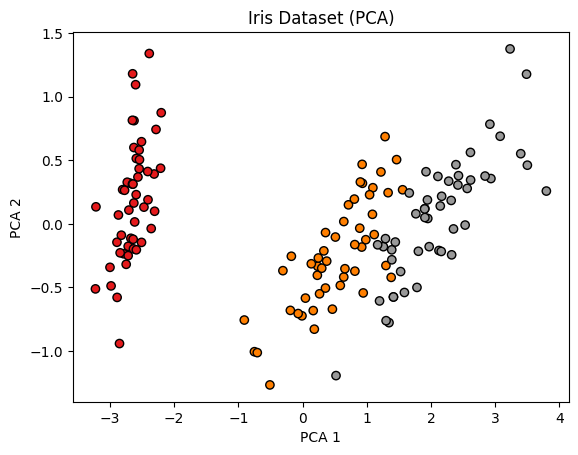

In [3]:
# 鸢尾花数据集，通常用于多分类任务，但可以将其限制为两类（如 Setosa 和 Versicolor）
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1.加载数据集
iris = load_iris()
X, y = iris.data, iris.target

# 2.数据探索
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())
print(df.describe())
print(df['target'].value_counts())

# 3.划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4.训练模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5.模型评估
y_pred = model.predict(X_test)
print("准确率:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 6.可视化决策边界
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Iris Dataset (PCA)')
plt.show()

In [1]:
# 乳腺癌数据集，用于二分类任务。

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. 加载数据集
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# 2. 数据探索
print("数据集特征：", feature_names)
print("数据集形状：", X.shape)
print("目标标签分布：", np.bincount(y))

# 3. 数据预处理
# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# 4. 模型训练
# 使用逻辑回归模型
model = LogisticRegression(max_iter=10000)  # 增加迭代次数以确保收敛
model.fit(X_train, y_train)

# 5. 模型评估
# 预测测试集
y_pred = model.predict(X_test)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("准确率：", accuracy)

# 生成分类报告
print("分类报告：\n", classification_report(y_test, y_pred))

# 生成混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("混淆矩阵：\n", cm)

# 可视化混淆矩阵
sns.heatmap(cm, annot=True, fmt="d")
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.xlabel("预测标签")
plt.ylabel("真实标签")
plt.title("混淆矩阵")
plt.show()

# 6. 特征重要性（逻辑回归）
# 获取特征系数（逻辑回归）
coefficients = model.coef_[0]

# 创建特征重要性图
feature_importance = pd.DataFrame(
    {"Feature": feature_names, "Importance": np.abs(coefficients)}
)
feature_importance = feature_importance.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance)
plt.title("特征重要性（逻辑回归）")
plt.show()

ModuleNotFoundError: No module named 'seaborn'